In [ ]:
import numpy as np
import matplotlib.pylab as plt
from tools import Config, turn_raw_dat_to_sorted_arrays
from tools_evo_dyn import tau_leap_symbiosis_mutation

In [3]:
cg_evo_1 =  Config(dict(eta = 4.12, g = 1.312, mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1,
                        r = 2.3, d = 1.3, theta = 8., v = 4.52, h = 0.382, nu_max = 3))

In [13]:
np.random.seed(2)
V = 100
init = np.array([0.1, 1., 0.2])
ds_1 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 2000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([2, -0.5]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.001, step = 20)

Simulation stop at time step 11103 as total Fs = 0.0, total As = 0.0, Hs = 83.0


In [29]:
from scipy.integrate import odeint
from tools_evo_dyn import tau
from tools_eco_dyn import system
init = np.array([0.1, 1., 0.2])
tseries = np.linspace(0, 10, 300)
tau(np.array([2]), np.array([-0.5]), cg_evo_1)
cg = Config(dict(mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1, rho = 2, nu = -0.5,
                 r = 2.3, d = 1.3, tau = tau(np.array([2]), np.array([-0.5]), cg_evo_1)))
xx = odeint(system, init, tseries, args=(cg,))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [14]:
dss_1 = turn_raw_dat_to_sorted_arrays(ds_1)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

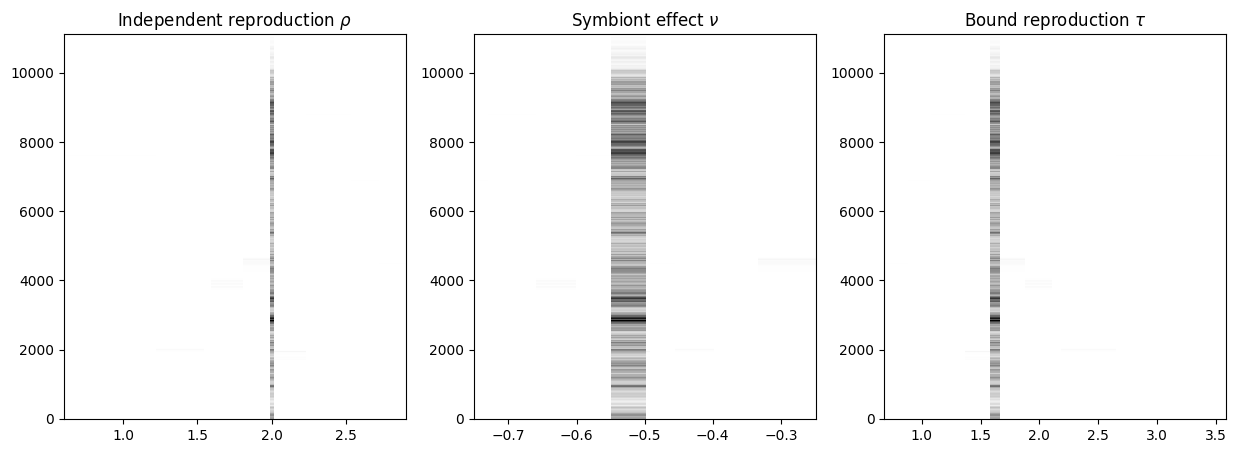

In [18]:
popmin_thres = 0
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_1["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["rho_sort"][cc[0]], ds_1["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_1["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["nu_sort"][cc[0]], ds_1["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_1["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["tau_sort"][cc[0]], ds_1["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")

In [21]:
sum(ds_1["x_F"][-1]), sum(ds_1["x_A"][-1]), sum(ds_1["x_H"][-1])

(np.float64(0.0), np.float64(1.0), np.float64(82.0))

In [22]:
ds_1["x_A"][-1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
np.random.seed(10)
V = 200
init = np.array([0.1, 1., 0.2])
ds_2 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 4000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([1, -0.8]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.001, step = 400)

/Users/phuongnguyen/Work/symbiosis_3D_tradeoff/tools_evo_dyn.py:8: RuntimeWarning: invalid value encountered in power
  return cg.theta - cg.v * rho**cg.h + (cg.eta * nu * (nu + cg.d) ** cg.g) / cg.nu_max


In [34]:
dss_2 = turn_raw_dat_to_sorted_arrays(ds_2)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

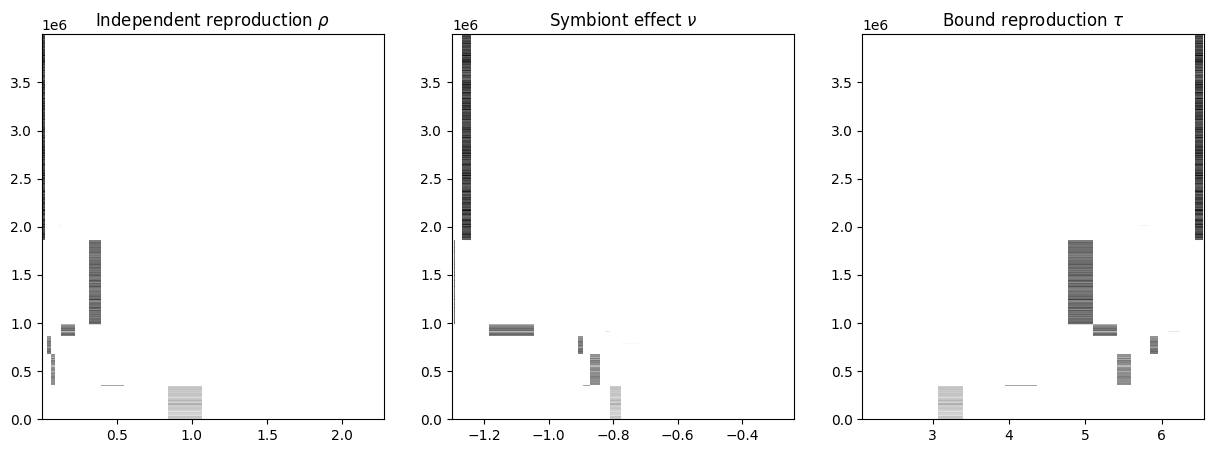

In [35]:
popmin_thres = 10
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_2["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_2["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_2["rho_sort"][cc[0]], ds_2["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_2["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_2["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_2["nu_sort"][cc[0]], ds_2["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_2["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_2["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_2["tau_sort"][cc[0]], ds_2["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")

In [ ]:
np.random.seed(102)
V = 100
init = np.array([0.1, 1., 0.2])
ds_3 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 2000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([2, -0.5]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.001, step = 200)

/Users/phuongnguyen/Work/symbiosis_3D_tradeoff/tools_evo_dyn.py:8: RuntimeWarning: invalid value encountered in power
  return cg.theta - cg.v * rho**cg.h + (cg.eta * nu * (nu + cg.d) ** cg.g) / cg.nu_max


In [6]:
dss_3 = turn_raw_dat_to_sorted_arrays(ds_3)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

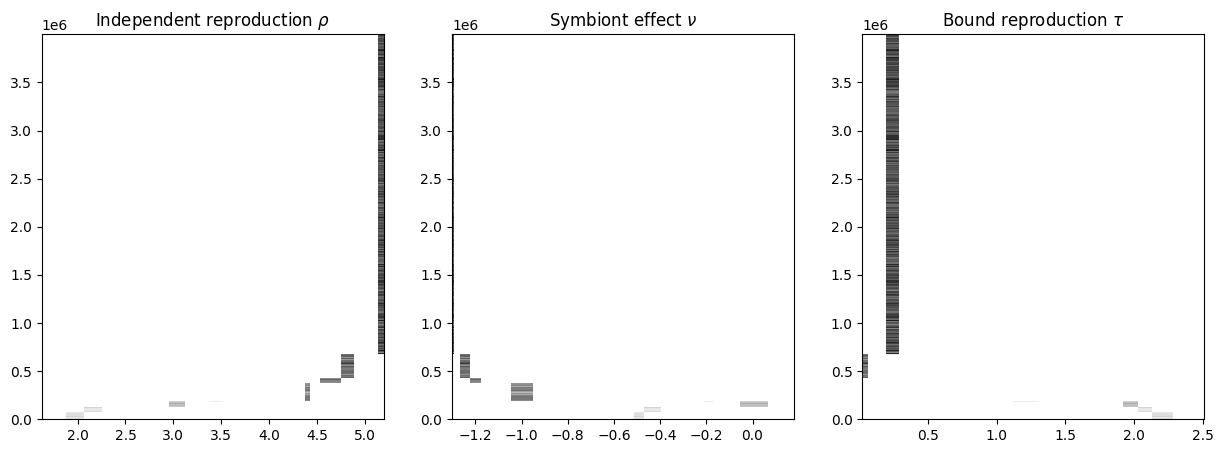

In [8]:
popmin_thres = 10
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_3["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["rho_sort"][cc[0]], ds_3["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_3["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["nu_sort"][cc[0]], ds_3["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_3["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["tau_sort"][cc[0]], ds_3["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")

(np.float64(224.0), np.float64(126.0), np.float64(54.0))